# **Project ==> CHURN PREDICTION**

In [63]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Loading the dataset
data = pd.read_csv("saved_model/dataset/Churn_Modelling.csv")

# Displaying the first few rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **1. Handle missing values**

In [65]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [66]:
# Displaying dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### **2. Remove Duplicates values**

In [67]:
# Remove duplicates values
data.duplicated().sum()

0

In [68]:
data.drop_duplicates(inplace=True)
# data = data.drop_duplicates()  ==>  This also works the same way

#### **3. Remove unwanted column**

In [69]:
# Remove unwanted columns
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


####  **4. Separating categorical and numerical columns**

In [70]:
categorical_cols = data.select_dtypes(include= 'object').columns
numerical_cols = data.select_dtypes(exclude= 'object').columns

print("categorical column: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

categorical column:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [71]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **5. Finding Unique values present in categorical columns**

In [72]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [73]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [74]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

#### **6. Correlation Heatmap**

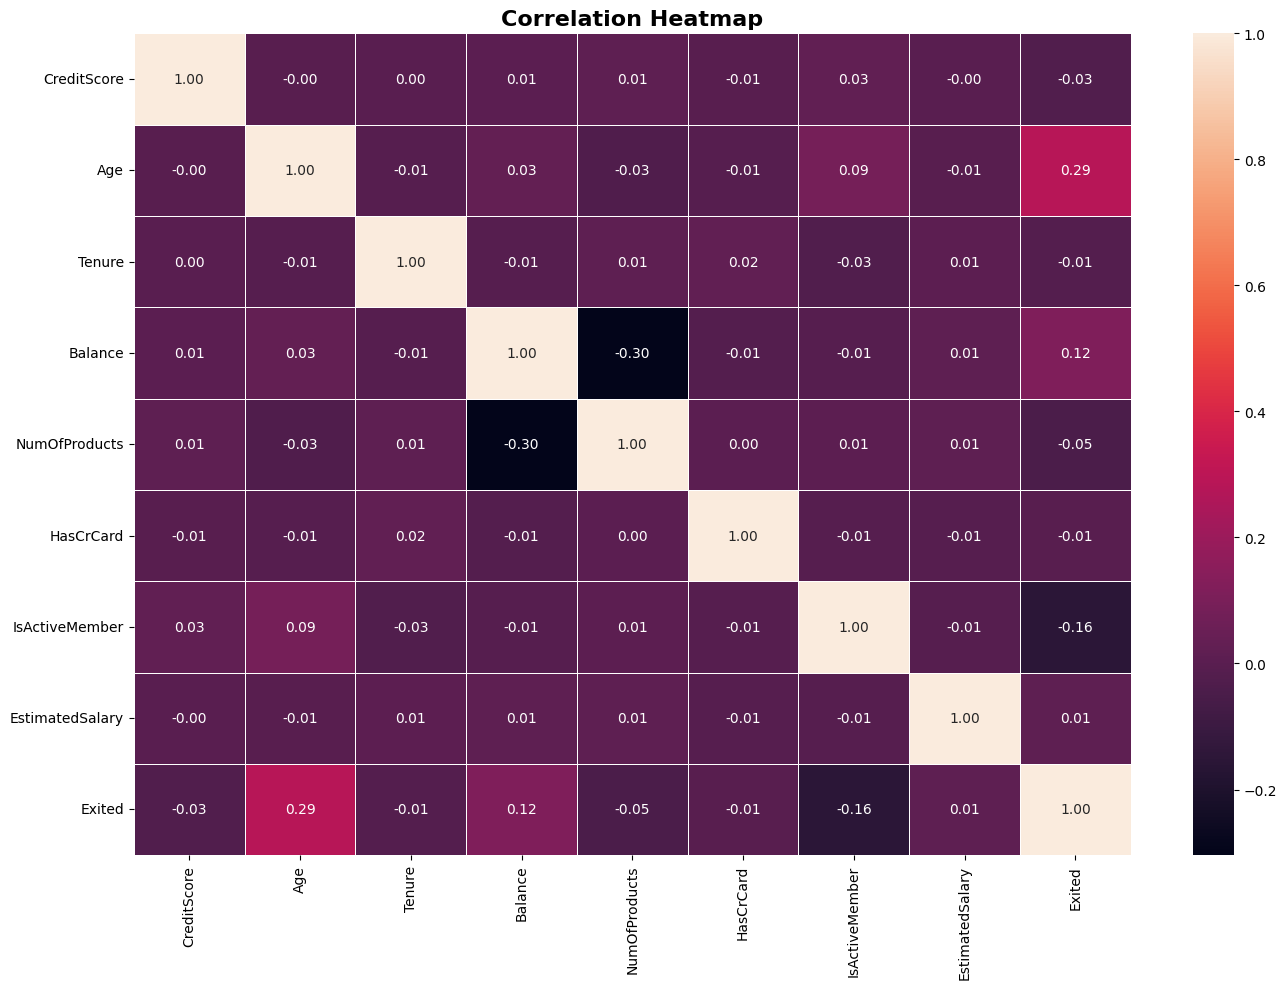

In [75]:
# Set the size of the plot so it is clearly visible
plt.figure(figsize=(14, 10))

# Calculate correlation between numerical features
# Correlation shows how strongly two variables are related
corr_matrix = data[numerical_cols].corr()

# Draw heatmap to visualize correlations
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values inside cells
    fmt=".2f",         # Display values upto 2 decimal places
    linewidths=0.5     # Add lines between cells for clarity
)

# Add title to explain what the plot represents
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")

# Adjust spacing so nothing overlaps
plt.tight_layout()

# Display the heatmap
plt.show()

In [76]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# Seperating Dependent and independent features
X = data.drop('Exited', axis=1)
y = data['Exited']

In [78]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [79]:
categorical_cols = X.select_dtypes(include= 'object').columns
numerical_cols = X.select_dtypes(exclude= 'object').columns

print("categorical column: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

categorical column:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


#### **7. Feature Pipelines**

In [80]:
# Importing necessary libraries for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Importing necessary libraries for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [81]:
# Defining the categories for ordinal encoding
gender_cat = ['Female', 'Male']
geo_cat = ['France', 'Spain', 'Germany']

In [82]:
# Creating pipelines for numerical and categorical features
# Pipeline for numerical features
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
               # Standardize numerical data
               # Helps the models learn faster and better

# Pipeline for categorical features
cat_pipeline = Pipeline(steps=[('ordinalencoder', OrdinalEncoder(categories=[geo_cat, gender_cat]))])
               # Convert categorical values into numbers

# Combine numerical and categorical pipelines

preprocessor = ColumnTransformer(
                [("num_pipeline", num_pipeline, numerical_cols),      # Apply numerical pipeline to numerical columns
                ("cat_pipeline", cat_pipeline, categorical_cols)]    # Apply categorical pipeline to categorical columns
                )

In [83]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [84]:
# Applying the preprocessing pipelines to the training and testing data
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns= preprocessor.get_feature_names_out())

In [85]:
X_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


In [86]:
X_test.head()


,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,-0.577496,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,2.0,1.0
1,-0.297297,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,0.0,1.0
2,-0.525607,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,1.0,0.0
3,-1.511492,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,2.0,1.0
4,-0.951094,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,1.0,0.0


In [87]:
import pickle

with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [89]:
(X_train.shape[1], )

(10,)

In [90]:
# dropout layer to prevent overfitting
from tensorflow.keras.layers import Dropout

In [91]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [94]:
## compile model with Recall & Precision
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=[
        'accuracy',
        # tf.keras.metrics.Recall(name='recall'),
        # tf.keras.metrics.Precision(name='precision')
    ]
)

In [95]:
## TensorBoard setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [96]:
## Early Stopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [97]:
### Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/200
250/250 [==============================] - 3s 7ms/step - loss: 0.4659 - accuracy: 0.7911 - val_loss: 0.3992 - val_accuracy: 0.8320
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3881 - accuracy: 0.8430 - val_loss: 0.3541 - val_accuracy: 0.8560
Epoch 3/200
250/250 [==============================] - 1s 6ms/step - loss: 0.3561 - accuracy: 0.8536 - val_loss: 0.3450 - val_accuracy: 0.8595
Epoch 4/200
250/250 [==============================] - 1s 6ms/step - loss: 0.3471 - accuracy: 0.8560 - val_loss: 0.3458 - val_accuracy: 0.8575
Epoch 5/200
250/250 [==============================] - 2s 7ms/step - loss: 0.3431 - accuracy: 0.8601 - val_loss: 0.3451 - val_accuracy: 0.8610
Epoch 6/200
250/250 [==============================] - 2s 6ms/step - loss: 0.3386 - accuracy: 0.8602 - val_loss: 0.3445 - val_accuracy: 0.8600
Epoch 7/200
250/250 [==============================] - 2s 6ms/step - loss: 0.3365 - accuracy: 0.8621 - val_loss: 0.3410 - val_accuracy: 0.8640

In [98]:
model.save('model.h5')

c:\Users\Admin\anaconda3\envs\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [99]:
loss=history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

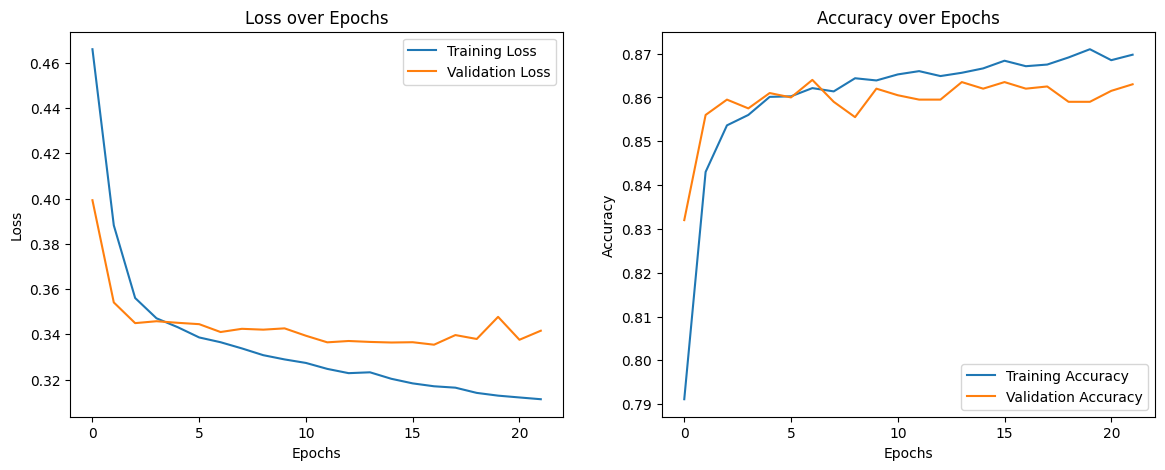

In [100]:
epochs = len(loss)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [101]:
## 🔴 CONFUSION MATRIX & CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

63/63 [==============================] - 0s 4ms/step


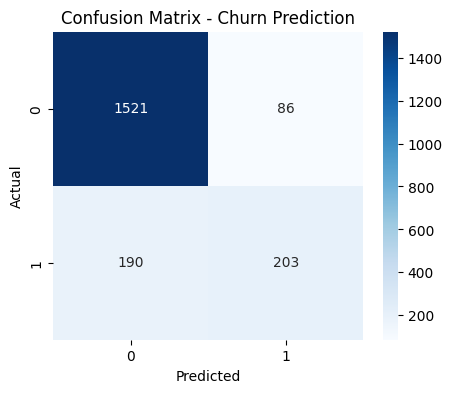

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [103]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

In [104]:
## Load Tensorboard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [107]:
%tensorboard --logdir logs/fit/20260116-142053/

Reusing TensorBoard on port 6007 (pid 6780), started 0:00:09 ago. (Use '!kill 6780' to kill it.)